In [1]:
!pip install scikit-learn==1.7.0

In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np

In [3]:
#Loading the dataset
data = pd.read_csv('/content/Titanic-Dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.shape

(891, 12)

In [5]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
#Filling null values in Age
data['Age'] = data['Age'].fillna(data.groupby(['Pclass', 'Sex'])['Age'].transform('median'))

In [7]:
data['Age'].isnull().sum()

np.int64(0)

In [8]:
#Extracing first letter of Cabin
data['Deck'] = data['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'Unknown')
#Drop original Cabin column
data.drop('Cabin', axis=1, inplace=True)

In [9]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Unknown
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,S,Unknown
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C


In [10]:
#Filling null values with mode
data['Embarked'].fillna('S', inplace=True)

/tmp/ipython-input-10-3844252312.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna('S', inplace=True)


In [11]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
print(data['Age'].value_counts())

Age
25.00    117
21.50     42
30.00     34
40.00     34
24.00     30
        ... 
24.50      1
0.67       1
0.42       1
34.50      1
74.00      1
Name: count, Length: 89, dtype: int64


In [13]:
print(data['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


In [14]:
print(data['Ticket'].value_counts())

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64


In [15]:
print(data['PassengerId'].value_counts())

PassengerId
891    1
1      1
2      1
3      1
4      1
      ..
16     1
15     1
14     1
13     1
12     1
Name: count, Length: 891, dtype: int64


In [16]:
data.drop(['Ticket','PassengerId'],axis=1,inplace=True)

In [17]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Unknown
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Unknown
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,C
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Unknown
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Unknown
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,B
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,23.4500,S,Unknown
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,C


In [18]:
data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [19]:
data.drop(['Name'],axis=1,inplace=True)

In [20]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,male,22.0,1,0,7.2500,S,Unknown,Mr
1,1,1,female,38.0,1,0,71.2833,C,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Unknown,Miss
3,1,1,female,35.0,1,0,53.1000,S,C,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Unknown,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Unknown,Rev
887,1,1,female,19.0,0,0,30.0000,S,B,Miss
888,0,3,female,21.5,1,2,23.4500,S,Unknown,Miss
889,1,1,male,26.0,0,0,30.0000,C,C,Mr


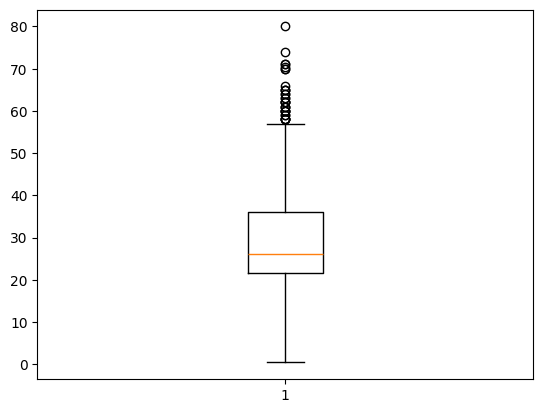

In [21]:
#Detecting outliers
import matplotlib.pyplot as plt
plt.boxplot(data['Age'])
plt.show()

In [22]:
data=data[(data['Age']>=2)&(data['Age']<=56)]

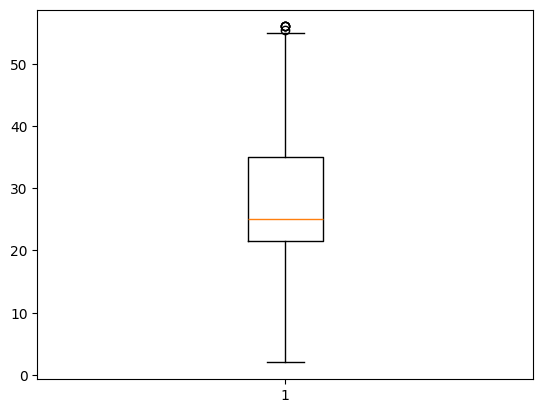

In [23]:
plt.boxplot(data['Age'])
plt.show()

In [24]:
#Splitting the dataset
x=data.drop(columns=['Survived']) #input
y=data['Survived']                #output
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,3,male,22.0,1,0,7.2500,S,Unknown,Mr
1,1,female,38.0,1,0,71.2833,C,C,Mrs
2,3,female,26.0,0,0,7.9250,S,Unknown,Miss
3,1,female,35.0,1,0,53.1000,S,C,Mrs
4,3,male,35.0,0,0,8.0500,S,Unknown,Mr
...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,Unknown,Rev
887,1,female,19.0,0,0,30.0000,S,B,Miss
888,3,female,21.5,1,2,23.4500,S,Unknown,Miss
889,1,male,26.0,0,0,30.0000,C,C,Mr


In [25]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [26]:
#Label Encoding
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
#Define categorical and numeric columns
categorical_cols = ['Sex', 'Embarked', 'Deck', 'Title']
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']

In [27]:
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical_cols),
    ('num', StandardScaler(), numeric_cols)
], remainder='passthrough')  #This keeps 'Pclass'

In [28]:
x_transformed = preprocessor.fit_transform(x)

# Step 2: Convert sparse to dense (fixes the error)
x_transformed = x_transformed.toarray()

# Step 3: Create column names
encoded_cat_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_columns = list(encoded_cat_names) + numeric_cols + ['Pclass']

# Step 4: Create DataFrame
x_transformed_df = pd.DataFrame(x_transformed, columns=all_columns)
x_transformed_df.head()

,Sex_male,Embarked_Q,Embarked_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,...,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Age,Fare,SibSp,Parch,Pclass
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,-0.555058,-0.489807,0.431236,-0.459274,3.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.886156,0.799964,0.431236,-0.459274,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.194754,-0.476211,-0.472000,-0.459274,3.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.615928,0.433712,0.431236,-0.459274,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.615928,-0.473693,-0.472000,-0.459274,3.0


In [29]:
#Train,Test Split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(
    x_transformed_df, y,test_size=0.2, random_state=42
)

In [30]:
#Model Training
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [31]:
predict = lr.predict(xtest)
predict

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1])

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict)

0.7988165680473372

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(xtrain, ytrain)
print("Random Forest Accuracy:", rf.score(xtest, ytest))


Random Forest Accuracy: 0.8106508875739645


In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)
predict1=knn.predict(xtest)
predict1

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict1)

0.7988165680473372

In [36]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam',hidden_layer_sizes=(5,2),random_state=2,max_iter=2000)
clf.fit(xtrain,ytrain)
predictclf=clf.predict(xtest)
predictclf

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1])

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predictclf)

0.7751479289940828

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid.fit(xtrain, ytrain)
print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Best Parameters: {'max_depth': 8, 'min_samples_split': 10, 'n_estimators': 100}
Best Accuracy: 0.8350912106135986


In [39]:
import joblib
import json

# Save model & preprocessor
joblib.dump(grid.best_estimator_, 'titanic_model.pkl')
joblib.dump(preprocessor, 'titanic_preprocessor.pkl')

# Save column names
with open('titanic_model_columns.json', 'w') as f:
    json.dump(all_columns, f)

In [40]:
from google.colab import files

# Download model file
files.download('titanic_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
files.download('titanic_preprocessor.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
files.download('titanic_model_columns.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>